In [ ]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

--2025-04-23 13:22:02--  https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6 [following]
--2025-04-23 13:22:02--  https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc366654f5b18925c660e91b29e8.dl.dropboxusercontent.com/cd/0/inline/CoVw3XQ-AnV0UQhCiAo6JFV3BVAnofUJbiNeuAOBruoe_ql9sd8t57l_787j6fa-4QMvF7R676Y3N7ZT38x1NT3YrVpEc-pCtSaMJIH6W148L9wF5cq2qA_5sE1wQfYAqZOsH4V93Q1V5d5fLcqXs1wb/file# [following]
--2025-04-23 13:22:02--  https://uc366654f5b18925c660e91

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.9 MB 23.6 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 89.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=400139 sha256=5cd13d9617516ad7109afb2bdac6203a05d1715f39a5b3a25cc5834c10d83a6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-tyg_vpu3/wheels/85/5d/45/8a23c7b77d2023fbc37490b8902f7fdeff5614f65d6e08b6c4
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=800a

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

from sklearn.impute import KNNImputer

import re
import seaborn as sns

In [ ]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory = False)
data.head(5)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0,33000,0,1099866,0,1099866,15080,0,R,0
1,2,160,H,13.0,46,143640,69,1,0,0,...,0,300000,0,214592,0,214592,83596,0,R,0
2,3,170,H,13.0,45,929106,24,1,1,0,...,0,216676,0,0,0,7400,0,0,T,0
3,4,151,H,13.0,46,172447,134,0,1,0,...,0,60000,0,272762,0,272762,10591,0,R,0
4,5,170,H,13.0,46,805250,116,0,1,1,...,0,272925,0,249562,0,75339,377782,0,R,0


# Fase 1 - Comprensión del negocio

Objetivo del Proyecto: Potenciar la toma de decisiones del banco a partir del análisis de datos de clientes. Este proyecto tiene como propósito principal que el banco utilice el análisis de datos para identificar oportunidades concretas que generen valor tanto para sus clientes como para la institución. A través del estudio de variables como renta, género, sobreendeudamiento, edad y acceso a productos financieros, se busca orientar estrategias más inclusivas, eficientes y alineadas con las necesidades reales de los usuarios. A partir de los hallazgos obtenidos, se proponen las siguientes líneas de acción:


1.   Queremos analizar si los internautas del banco son mas comunes en ciertos rangos de edad, para entender si las personas jovenes usan mas la web o no. esto sirve para tomar decisiones de marketing segun la edad. usaremos las variables de edad y internauta.

2.   Queremos analizar el porcentaje de internautas que son hombres o mujeres.

3.   ver si clientes con mas cupo usan mas la web.

4.   ver si tener productos bancarios se relaciona con el uso de la web.

5.   ver si clientes con un solo producto usan menos la web.

6.   Mejorar el acceso al crédito para mujeres emprendedoras. Los datos revelan una brecha significativa en los ingresos promedio entre hombres y mujeres. Para reducir esta desigualdad, el banco podría diseñar productos financieros específicos para mujeres que emprenden, con condiciones preferenciales y acompañamiento técnico. Esto no solo promueve la equidad de género, sino que también fortalece el desarrollo económico local y fideliza un segmento históricamente subatendido.

7.   Prevenir el sobreendeudamiento mediante programas de refinanciamiento. El análisis muestra un alza en el sobreendeudamiento, especialmente en ciertos meses del año. El banco puede anticiparse a esta situación ofreciendo opciones de refinanciamiento o créditos con planificación anticipada, como campañas en noviembre para aliviar la carga financiera que se produce en febrero. Estas medidas permitirán proteger la estabilidad financiera de los clientes y reducir los riesgos crediticios para la institución.

8.   Expandir la red de sucursales en regiones con baja cobertura Los patrones geográficos de acceso a productos financieros pueden mostrar desigualdades territoriales. Con base en estos datos, el banco podría evaluar la apertura de nuevas sucursales o puntos de atención digital en regiones menos atendidas, mejorando la inclusión financiera y captando nuevos clientes en zonas con potencial de crecimiento.

9.   ¿Hay segmentos más rentables o activos?

10.  Identificar características de los segmentos de clientes que presentan mayor actividad o rentabilidad, entendida esta como mayor uso (número de transacciones) y/o mayor facturación con productos financieros.




#Fase 2 - Comprensión de los datos

Grafico 1
Queremos ver el porcentaje de personas que usan la web por rango de edad.

<ipython-input-14-3b82d52a95ce>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = data.groupby(['RangoEdad', 'Internauta']).size().unstack(fill_value=0)


Internauta  PorcentajeInternautas
RangoEdad                        
<25                     80.596520
25-35                   82.685937
35-45                   67.304655
45-60                   49.722592
60+                     26.053042


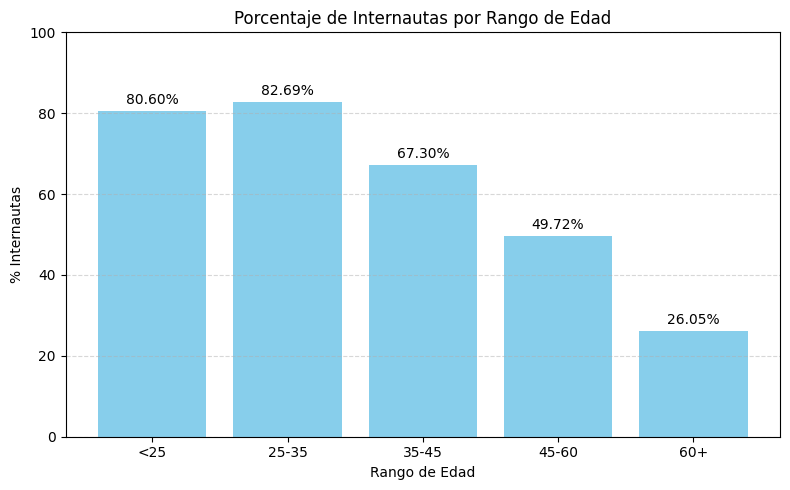

In [ ]:
#definir variables para el grafico(1- intervalos para el grafico, 2- etiquetas(texto), 3- cargar datos)
bins = [0, 25, 35, 45, 60, 120]
labels = ['<25', '25-35', '35-45', '45-60', '60+']
data['RangoEdad'] = pd.cut(data['Edad'], bins=bins, labels=labels)

# contar datos
grupo = data.groupby(['RangoEdad', 'Internauta']).size().unstack(fill_value=0)

# pasar datos a porcentajes
grupo['Total'] = grupo.sum(axis=1)
grupo['PorcentajeInternautas'] = (grupo[1] / grupo['Total']) * 100

# tabla
print(grupo[['PorcentajeInternautas']])

# grafico barras
plt.figure(figsize=(8, 5))
plt.bar(grupo.index.astype(str), grupo['PorcentajeInternautas'], color='skyblue')
bars = plt.bar(grupo.index.astype(str), grupo['PorcentajeInternautas'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title('Porcentaje de Internautas por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('% Internautas')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Podemos observar que las personas mas jovenes de entre 25 a 45 años son mas propensas a ser internautas, esto puede deberse a varios factores.

Grafico 2
Queremos ver de todos los internautas que genero ocupa mas la web, hombres o mujeres.

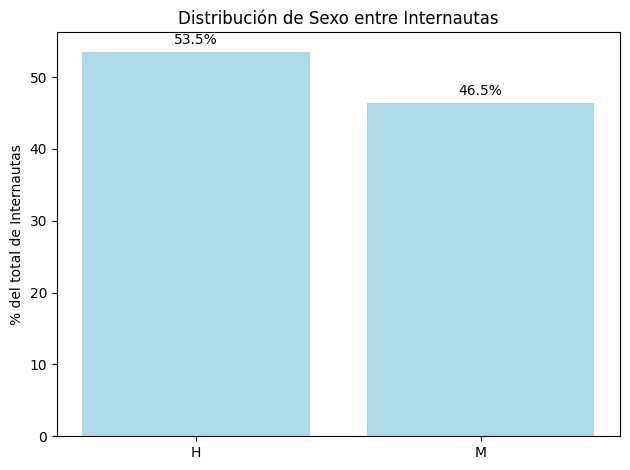

In [ ]:
internautas = data[data['Internauta'] == 1]
sexo_internautas = internautas['Sexo'].value_counts(normalize=True) * 100

plt.figure()
bars = plt.bar(sexo_internautas.index, sexo_internautas.values, color='lightblue')
plt.title('Distribución de Sexo entre Internautas')
plt.ylabel('% del total de Internautas')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center')
plt.tight_layout()
plt.show()

Podemos observar que el genero que ocupa mas la web es el genero masculino pero la diferencia es muy baja entre generos con solo un 3.5% de diferencia.

Grafico 3
Queremos ver si los clientes con un cupo mayor usan aun mas la web o no respecto a uno con menos cupo

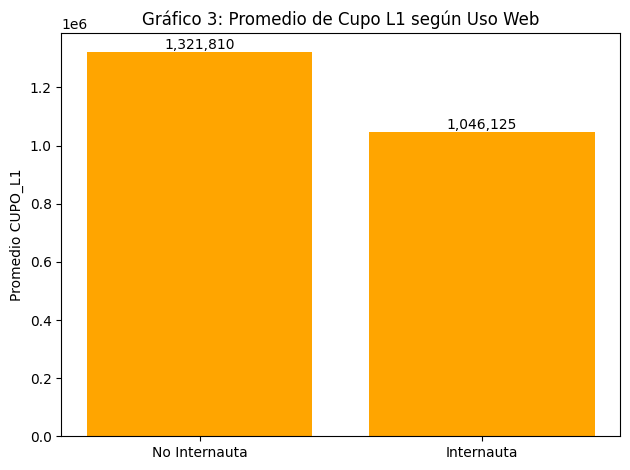

In [ ]:
grupo3 = data.groupby('Internauta')['CUPO_L1'].mean()

plt.figure()
bars = plt.bar(['No Internauta', 'Internauta'], grupo3, color='orange')
plt.title('Gráfico 3: Promedio de Cupo L1 según Uso Web')
plt.ylabel('Promedio CUPO_L1')
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, f'{int(yval):,}', ha='center')
plt.tight_layout()
plt.show()

Podemos observar que los clientes con un mayor cupo usan menos la web.

Grafico 4
Queremos ver la cantidad de clientes que son internautas tienen una cuenta corriente.

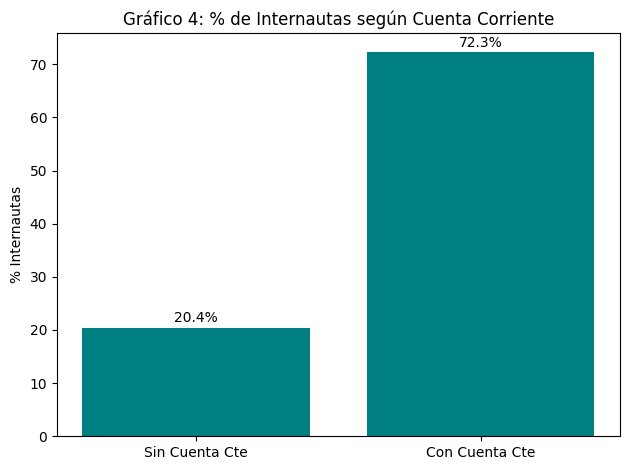

In [ ]:
cta = data.groupby(['Ctacte', 'Internauta']).size().unstack(fill_value=0)
cta['%Internautas'] = (cta[1] / (cta[0] + cta[1])) * 100

plt.figure()
labels = ['Sin Cuenta Cte', 'Con Cuenta Cte']
bars = plt.bar(labels, cta['%Internautas'], color='teal')
plt.title('Gráfico 4: % de Internautas según Cuenta Corriente')
plt.ylabel('% Internautas')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center')
plt.tight_layout()
plt.show()

Podemos observar que un 72.3% de los internautas tienen una cuenta Corriente

Grafico 5
Queremos ver si los clientes con 1 solo producto usan mas o menos la web.

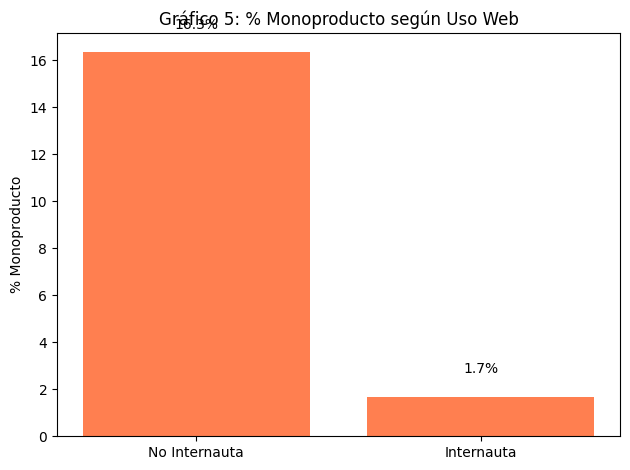

In [ ]:
mono = data.groupby('Internauta')['Monoproducto'].mean() * 100

plt.figure()
bars = plt.bar(['No Internauta', 'Internauta'], mono, color='coral')
plt.title('Gráfico 5: % Monoproducto según Uso Web')
plt.ylabel('% Monoproducto')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center')
plt.tight_layout()
plt.show()

Podemos observar que los clientes con un solo producto no ocupan la web, solo el 1.7% si.

GRAFICO 6 DE RENTA POR GÉNERO


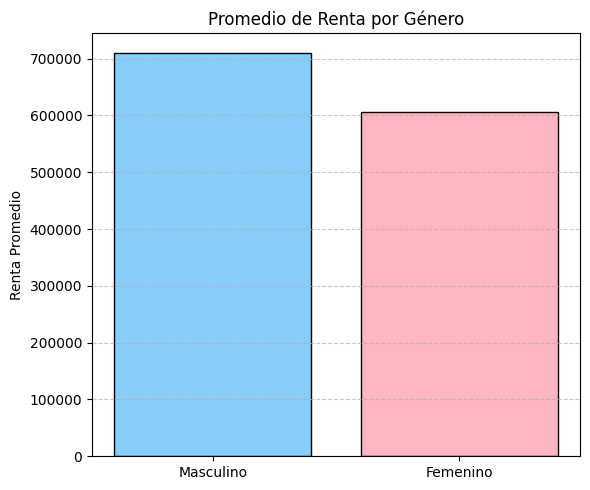

In [ ]:
df = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory=False)

df['Sexo'] = df['Sexo'].astype(str).str.strip().str.upper()
df['Renta'] = pd.to_numeric(df['Renta'], errors='coerce')


promedio_renta = df.groupby('Sexo')['Renta'].mean()

labels = ['Femenino' if sexo == 'M' else 'Masculino' for sexo in promedio_renta.index]
colors = ['#FFB6C1' if sexo == 'M' else '#87CEFA' for sexo in promedio_renta.index]

# Graficar
plt.figure(figsize=(6, 5))
plt.bar(labels, promedio_renta, color=colors, edgecolor='black')
plt.title('Promedio de Renta por Género')
plt.ylabel('Renta Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico evidencia una diferencia significativa en los ingresos promedio según género. Mientras los hombres presentan una renta promedio superior a los 700 mil pesos, las mujeres alcanzan un promedio cercano a los 600 mil pesos. Esta brecha refleja una desigualdad en los ingresos que puede tener múltiples causas, como diferencias en el acceso a oportunidades laborales, tipos de empleo o condiciones contractuales.

Ante este panorama, el banco puede aprovechar esta información para diseñar productos financieros más inclusivos, tales como créditos con mejores condiciones para mujeres o cuentas sin costo de mantención, especialmente dirigidas a quienes tienen ingresos más bajos.

Este tipo de análisis permite identificar oportunidades para reducir desigualdades y promover la inclusión financiera, contribuyendo así a una sociedad más equitativa. Además, se abre la posibilidad de fomentar el emprendimiento femenino, mejorar el acceso a servicios bancarios y fidelizar a jóvenes usuarias con potencial de crecimiento financiero dentro del banco.

Con estas acciones, se busca no solo equilibrar el acceso, sino también fortalecer la relación entre el banco y un segmento clave, generando confianza y acompañamiento en su desarrollo económico.

GRÁFICO 7 DE LA CANTIDAD DE CLIENTES POR REGIÓN

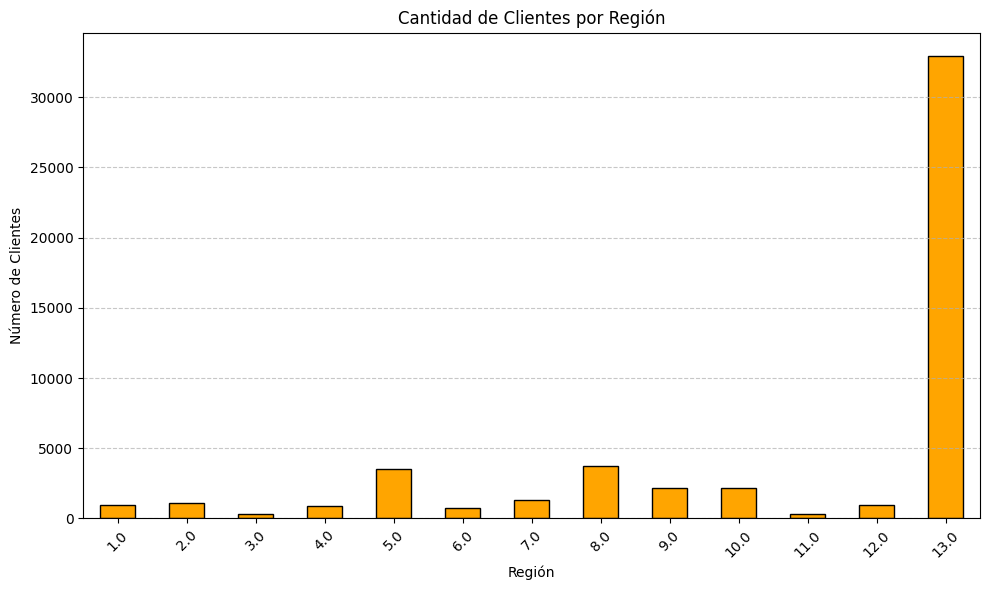

In [ ]:
conteo_region = data['Region'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
conteo_region.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Cantidad de Clientes por Región')
plt.xlabel('Región')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"El gráfico muestra una alta concentración de clientes en la Región Metropolitana, lo que sugiere la conveniencia de abrir nuevas sucursales en dicha zona para mejorar la cobertura y atención a los clientes."

GRÁFICO 8 DE CLIENTES SOBREENDEUDADOS

In [ ]:
df = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory=False)

df['Sexo'] = df['Sexo'].astype(str).str.upper()
df['Renta'] = pd.to_numeric(df['Renta'], errors='coerce')
df['UsoL1_T12'] = pd.to_numeric(df['UsoL1_T12'], errors='coerce')

df['Sobreendeudamiento'] = df['UsoL1_T12'] / df['Renta']

id_column = None
for col in df.columns:
    if 'id' in col.lower():
        id_column = col
        break

if id_column:
    top_deudores = df[[id_column, 'Sexo', 'Renta', 'UsoL1_T12', 'Sobreendeudamiento']].sort_values(
        by='UsoL1_T12', ascending=False).head(10)
else:
    top_deudores = df[['Sexo', 'Renta', 'UsoL1_T12', 'Sobreendeudamiento']].sort_values(
        by='UsoL1_T12', ascending=False).head(10)

print("Top 10 de clientes con más deuda y su sobreendeudamiento:\n")
print(top_deudores.to_string(index=False))

Top 10 de clientes con más deuda y su sobreendeudamiento:

   Id Sexo     Renta  UsoL1_T12  Sobreendeudamiento
44966    H  908507.0  5599215.0            6.163095
14536    H  565328.0  4470259.0            7.907372
50972    H  783476.0  4458112.0            5.690170
43264    H 3150342.0  4315595.0            1.369881
46662    H 2581825.0  4311923.0            1.670107
50043    M 1128576.0  4001674.0            3.545773
44429    H  706445.0  3774311.0            5.342682
44797    H  667317.0  3739508.0            5.603795
49553    H 1181000.0  3715208.0            3.145815
46387    M  797500.0  3648171.0            4.574509


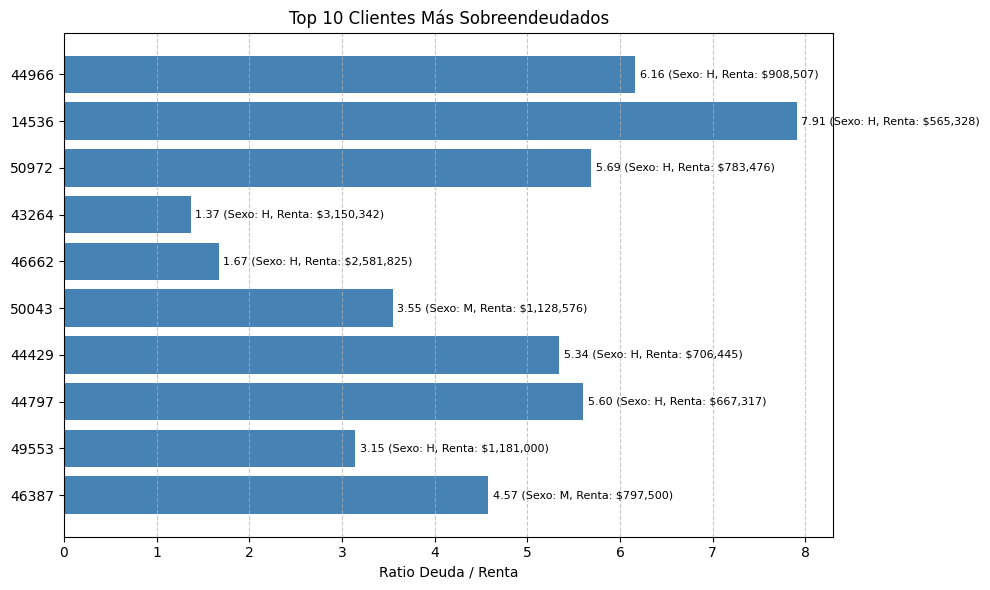

In [ ]:
df = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory=False)

df['Sexo'] = df['Sexo'].astype(str).str.upper()
df['Renta'] = pd.to_numeric(df['Renta'], errors='coerce')
df['UsoL1_T12'] = pd.to_numeric(df['UsoL1_T12'], errors='coerce')

df['Sobreendeudamiento'] = df['UsoL1_T12'] / df['Renta']

top_deudores = df.sort_values(by='UsoL1_T12', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_deudores['Id'].astype(str), top_deudores['Sobreendeudamiento'], color='steelblue')
plt.xlabel('Ratio Deuda / Renta')
plt.title('Top 10 Clientes Más Sobreendeudados')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for idx, bar in enumerate(bars):
    row = top_deudores.iloc[idx]
    ratio = row['Sobreendeudamiento']
    renta = row['Renta']
    sexo = row['Sexo']
    texto = f'{ratio:.2f} (Sexo: {sexo}, Renta: ${renta:,.0f})' if pd.notna(ratio) else 'Dato faltante'
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2, texto, va='center', fontsize=8)

plt.tight_layout()
plt.show()

El gráfico evidencia un aumento significativo en el nivel de sobreendeudamiento de los clientes durante el mes 11. Esta alza coincide con la temporada de festividades, como "navidad y año Nuevo", así como con la planificación de vacaciones, lo que conlleva un mayor gasto por parte de los usuarios.

Ante este comportamiento, el banco ha decidido implementar una estrategia de refinanciamiento para sus clientes, con el objetivo de aliviar su carga financiera y ofrecer condiciones más flexibles de pago. Esta medida busca no solo apoyar a los clientes en un periodo de alto consumo, sino también fortalecer su fidelidad y compromiso con la institución financiera.

GRÁFICO 9 DE CLIENTES CON CRÉDITO HIPOTECARIO

<ipython-input-14-460095763809>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hipotecario['GrupoEdad'] = pd.cut(df_hipotecario['Edad'], bins=bins, labels=labels, right=False)


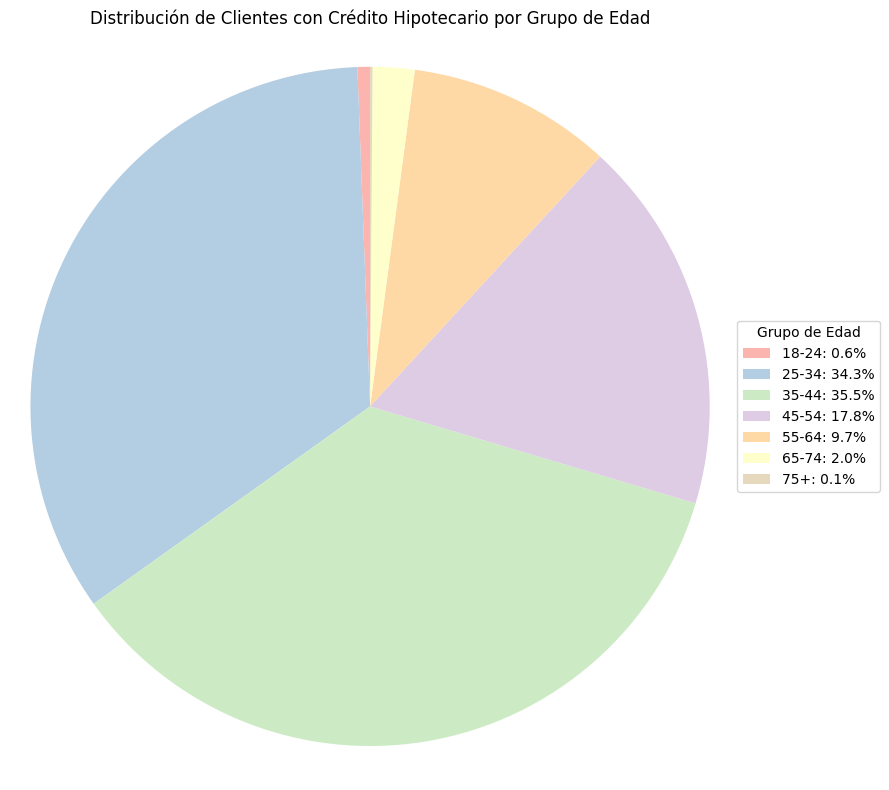

In [ ]:
df = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory=False)


df_hipotecario = df[df['Hipotecario'] == 1]

bins = [18, 25, 35, 45, 55, 65, 75, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
df_hipotecario['GrupoEdad'] = pd.cut(df_hipotecario['Edad'], bins=bins, labels=labels, right=False)

conteo = df_hipotecario['GrupoEdad'].value_counts().sort_index()
porcentajes = conteo / conteo.sum() * 100
etiquetas = [f"{grupo}: {porcentaje:.1f}%" for grupo, porcentaje in zip(conteo.index, porcentajes)]

plt.figure(figsize=(9, 8))
wedges, texts = plt.pie(
    conteo,
    labels=None,
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    wedgeprops=dict(width=1)
)

plt.legend(
    wedges,
    etiquetas,
    title='Grupo de Edad',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.title('Distribución de Clientes con Crédito Hipotecario por Grupo de Edad')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
ProfileReport(df[['Hipotecario', 'Edad']])

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00, 37.20it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

En el análisis de los créditos hipotecarios, observamos que de un total de 51.124 clientes, solo 7.032 cuentan con un crédito hipotecario, mientras que 44.092 no lo tienen. Esto significa que la gran mayoría de los clientes del banco aún no accede a este tipo de financiamiento, lo que representa una oportunidad estratégica clave.

Cuando analizamos la edad de quienes sí tienen crédito hipotecario, notamos que la mayor concentración se encuentra entre los 25 y 44 años. Esta etapa de la vida coincide con decisiones importantes como independizarse, formar una familia o comprar la primera vivienda.

Por otro lado, los clientes mayores de 45 años participan menos en este tipo de crédito, probablemente por las restricciones de edad que imponen los bancos, o porque están más cerca de la jubilación y ya no califican para créditos de largo plazo. En los extremos etarios, es decir, menores de 25 y mayores de 65 años, la participación es aún más baja.

Por eso, este análisis permite al banco identificar tres segmentos clave para actuar:

Los jóvenes: se pueden diseñar productos con aval familiar, beneficios especiales para profesionales recién titulados y educación financiera que incentive el ahorro para la vivienda.

Los adultos mayores: podrían beneficiarse de hipotecas inversas o créditos flexibles que se ajusten a su realidad.

Y los más de 44 mil clientes que aún no tienen crédito hipotecario: aquí se abre un espacio importante para campañas de acceso a la vivienda, alianzas con inmobiliarias y simuladores que muestren que incluso con ingresos medios es posible financiar una casa.

En resumen, aunque la demanda actual se concentra en personas de entre 25 y 44 años, existe un amplio potencial de crecimiento en otros grupos si el banco se adapta a sus necesidades y desarrolla productos innovadores.

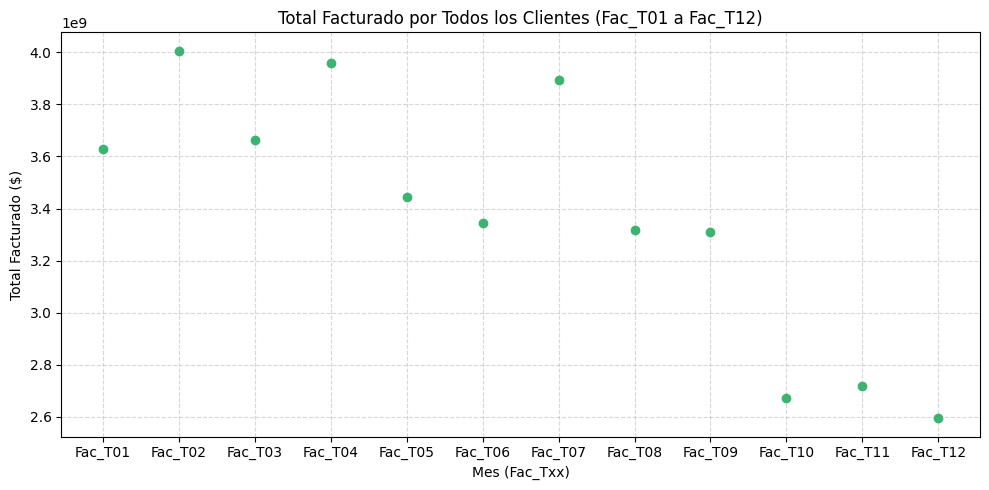

In [ ]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory=False)

fac_columns = [f'Fac_T{str(i).zfill(2)}' for i in range(1, 13)]

for col in fac_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

total_por_mes = data[fac_columns].sum()

plt.figure(figsize=(10, 5))
plt.plot(total_por_mes.index, total_por_mes.values, 'o', color='mediumseagreen')
plt.title('Total Facturado por Todos los Clientes (Fac_T01 a Fac_T12)')
plt.xlabel('Mes (Fac_Txx)')
plt.ylabel('Total Facturado ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Campañas de préstamos en noviembre

Se recomienda lanzar campañas de préstamos en noviembre, anticipándose al aumento de gastos que enfrentan los clientes en febrero por vacaciones y el inicio del año escolar.

Fundamentación: Prevención del sobreendeudamiento: permite planificar gastos y evitar deudas impulsivas con altas tasas.

Mejor gestión financiera: entrega liquidez con condiciones preferenciales para organizar el presupuesto con anticipación.

Mayor fidelización: el banco se posiciona como un aliado que entiende y responde a las necesidades de sus clientes.

Ventaja competitiva: adelantarse a la competencia en la oferta de crédito.

Mejor distribución operativa: reduce la carga en temporada alta de enero-febrero.

Esta estrategia apoya a los clientes y fortalece la relación con el banco mediante soluciones oportunas y responsables.

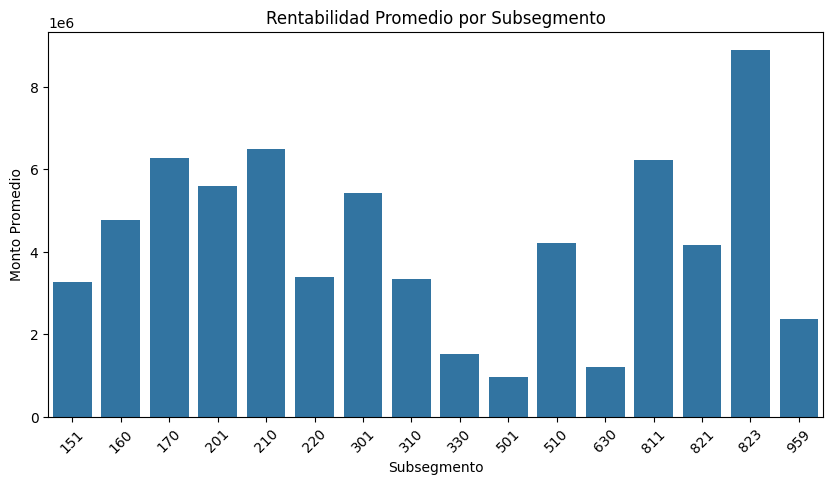

In [ ]:
fac_cols = [col for col in df.columns
            if re.search(r'fac|cn|ci|ccot', col.lower())
            and df[col].dtype in (np.int64, np.float64)]

df['Rentabilidad_Total'] = df[fac_cols].sum(axis=1)

segment_rent = df.groupby('Subsegmento')['Rentabilidad_Total'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=segment_rent.index, y=segment_rent.values)
plt.xticks(rotation=45)
plt.title("Rentabilidad Promedio por Subsegmento")
plt.ylabel("Monto Promedio")
plt.show()

#Fase 3 - Preaparación de datos

Limpiar datos codificarlos, escalados, preparados.

Se detectaron algunas columnas con valores faltantes, como por ejemplo Edad, CUPO_L1 y Sexo. En este caso, se decidió eliminar filas con valores nulos solo si afectaban a las variables seleccionadas para el análisis. Por ejemplo, si faltaba la edad de un cliente, se eliminó porque es un dato clave en el estudio.

ver si hay nulos en los datos y en caso de si, limpiarlos

In [ ]:
# imprimir cantidad nulos
print(data[['Edad', 'CUPO_L1', 'Sexo']].isnull().sum())

# Eliminarlo
data = data.dropna(subset=['Edad', 'CUPO_L1', 'Sexo'])

# imprimir de nuevo
print("limpieza:")
print(data[['Edad', 'CUPO_L1', 'Sexo']].isnull().sum())


Edad       0
CUPO_L1    0
Sexo       1
dtype: int64
limpieza:
Edad       0
CUPO_L1    0
Sexo       0
dtype: int64


estandarizacion edad y cupo_l1

In [ ]:
data['Edad_std'] = (data['Edad'] - data['Edad'].mean()) / data['Edad'].std()
data['CUPO_L1_std'] = (data['CUPO_L1'] - data['CUPO_L1'].mean()) / data['CUPO_L1'].std()

# imprimir
data[['Edad', 'Edad_std', 'CUPO_L1', 'CUPO_L1_std']].head()


,Edad,Edad_std,CUPO_L1,CUPO_L1_std
0,43,0.322998,798000,-0.311245
1,46,0.548527,750000,-0.355816
2,45,0.473351,1350000,0.201322
3,46,0.548527,1570800,0.406349
4,46,0.548527,2762000,1.512454


Codificacion

In [ ]:
# reemplazar numero por si/no
data['/ Es internautas Si/No'] = data['Internauta'].replace({'0': 'No', '1': 'Sí'})

# imprimir
print(data[['Internauta', '/ Es internautas Si/No']].head())



   Internauta  / Es internautas Si/No
0           1                       1
1           1                       1
2           1                       1
3           0                       0
4           0                       0


Eliminar los valores nulos en Renta y Monto Facturado se justifica porque:

-Evita errores y sesgos en cálculos y análisis estadísticos.

-Mejora la calidad de los datos, permitiendo conclusiones más confiables.

Se codificó el sexo como 1 (Hombre) y 0 (Mujer) porque los modelos no procesan texto, requieren valores numéricos. Esto mejora el análisis, permite aplicar modelos estadísticos y es una práctica común en ciencia de datos.

Se estandarizó la Renta junto con Sexo porque sus escalas numéricas son muy distintas:

-Renta puede tener valores en miles o millones.

-Sexo está codificado como 0 (mujer) y 1 (hombre).

Al estandarizar, todas las variables quedan en una escala comparable (media = 0, desviación estándar = 1), lo que facilita interpretaciones y cálculos más precisos.

In [ ]:
ProfileReport(df[['Renta', 'Sexo']])

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ProfileReport(df[['UsoL1_T12']])

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

ESCALAMIENTO Y CODIFICACIÓN EN RENTA Y SEXO

In [ ]:
df = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory=False)

df['Sexo'] = df['Sexo'].astype(str).str.upper().map({'M': 0, 'H': 1})
df['Renta'] = pd.to_numeric(df['Renta'], errors='coerce')

columnas_a_escalar = ['Renta', 'Sexo']
datos_a_escalar = df[columnas_a_escalar].dropna()

scaler = StandardScaler()
scaler.fit(datos_a_escalar)
array_scaler = scaler.transform(datos_a_escalar)

array_scaler

array([[-1.26930574,  0.90488016],
       [ 0.65039495,  0.90488016],
       [-1.19890064,  0.90488016],
       ...,
       [-0.0919296 ,  0.90488016],
       [ 0.35005816,  0.90488016],
       [ 0.43476327,  0.90488016]])

In [ ]:
df_scaler = pd.DataFrame(array_scaler)
df_scaler

,0,1
0,-1.269306,0.904880
1,0.650395,0.904880
2,-1.198901,0.904880
3,0.347687,0.904880
4,0.109185,0.904880
...,...,...
37748,-0.607766,-1.105119
37749,-0.728350,0.904880
37750,-0.091930,0.904880
37751,0.350058,0.904880


In [ ]:
df_scaler.describe()

,0,1
count,3.775300e+04,3.775300e+04
mean,5.420399e-17,2.070291e-18
std,1.000013e+00,1.000013e+00
min,-1.620363e+00,-1.105119e+00
25%,-5.938767e-01,-1.105119e+00
50%,-2.346022e-01,9.048802e-01
75%,3.711037e-01,9.048802e-01
max,3.037031e+01,9.048802e-01


LIMPIEZA DE NULOS EN LAS COLUMNAS RENTA Y SEXO

In [ ]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df[['Renta']] = knn_imputer.fit_transform(df[['Renta']])
df

LIMPIEZA DE NULOS EN LA COLUMNA DE MONTO EN DEUDA EN LÍNEA DE CRÉDITO EN EL MES 12

In [ ]:
df = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory=False)
df.columns = df.columns.str.strip()

df['Renta'] = pd.to_numeric(df['Renta'].astype(str).str.replace(',', '.'), errors='coerce')
df['UsoL1_T12'] = pd.to_numeric(df['UsoL1_T12'].astype(str).str.replace(',', '.'), errors='coerce')

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df[['Renta', 'UsoL1_T12']] = knn_imputer.fit_transform(df[['Renta', 'UsoL1_T12']])

df['Sexo'] = df['Sexo'].astype(str).str.strip().str.upper()
df['Sexo'] = df['Sexo'].map({'M': 0.0, 'H': 1.0})

df

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,0.0,13.0,43,778356.500000,130,1,1,0,...,0,33000,0,1099866,0,1099866,15080,0,R,0
1,2,160,1.0,13.0,46,143640.000000,69,1,0,0,...,0,300000,0,214592,0,214592,83596,0,R,0
2,3,170,1.0,13.0,45,929106.000000,24,1,1,0,...,0,216676,0,0,0,7400,0,0,T,0
3,4,151,1.0,13.0,46,172447.000000,134,0,1,0,...,0,60000,0,272762,0,272762,10591,0,R,0
4,5,170,1.0,13.0,46,805250.000000,116,0,1,1,...,0,272925,0,249562,0,75339,377782,0,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,1.0,13.0,51,364978.000000,57,1,1,1,...,0,300000,0,478320,0,478320,12668,0,R,0
51120,51121,170,1.0,13.0,51,625376.000000,39,1,0,0,...,0,166098,0,166098,0,0,572363,0,R,0
51121,51122,160,1.0,13.0,47,806220.000000,153,1,1,0,...,0,18891,0,9652,0,9652,16241,0,R,0
51122,51123,160,0.0,13.0,47,663077.078726,11,1,0,0,...,0,26528,0,24638,0,24638,84982,0,R,0


<ipython-input-35-0d31235f8276>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


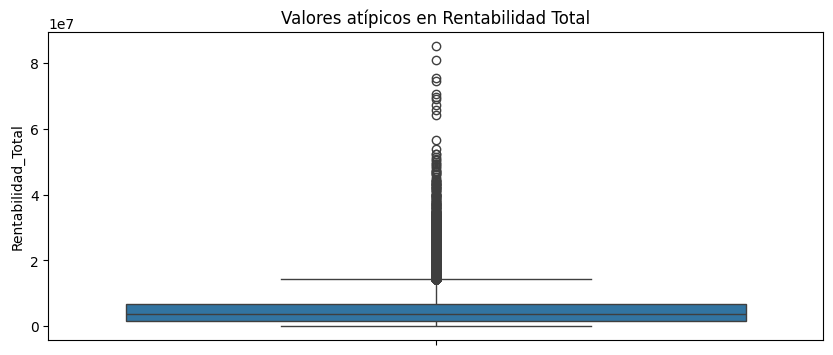

In [ ]:
# Imputación de nulos numéricos con la mediana
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
plt.figure(figsize=(10, 4))
sns.boxplot(df['Rentabilidad_Total'])
plt.title("Valores atípicos en Rentabilidad Total")
plt.show()